# II. Data Cleaning and EDA

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from imblearn.pipeline import make_pipeline
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# SKlearn imports:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn import set_config
set_config(display = 'diagram')
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingRegressor, RandomForestRegressor


from nltk.stem import WordNetLemmatizer 
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')

from imblearn.pipeline import make_pipeline

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split



#go back and remove what you don't use

In [18]:
subreddits=pd.read_csv('./data/final_df')

In [19]:
subreddits.head()

,subreddit,title,is_mgs,clean_title
0,skyrim,Hired thugs make bad choices lol,0,hired thug make bad choice lol
1,skyrim,TIL you can find a madwoman out in the wildern...,0,til find madwoman wilderness sheogorath's ques...
2,skyrim,I Have All Skyrim Books in EPUB Format,0,skyrim book epub format
3,skyrim,Foggy night,0,foggy night
4,skyrim,First trophy was not a month after release. To...,0,first trophy month release today completed ody...


In [33]:
subreddits.tail()

,subreddit,title,is_mgs,clean_title,title_length,title_word_count
995,metalgearsolid,Finished Metal Gear 1! That's a lotta bodies...,1,finished metal gear 1 that's lotta body,47,8
996,metalgearsolid,Mgs3 ending,1,mgs3 ending,11,2
997,metalgearsolid,I cry every time,1,cry every time,16,4
998,metalgearsolid,"This thing is long gone, but it used to look s...",1,thing long gone used look good car,65,15
999,metalgearsolid,Digital painting of Venom Snake,1,digital painting venom snake,31,5


In [22]:
subreddits['title_length']=subreddits['title'].str.len()
subreddits['title_length']

0       32
1      119
2       38
3       11
4       73
      ... 
995     47
996     11
997     16
998     65
999     31
Name: title_length, Length: 1000, dtype: int64

In [23]:
subreddits['title_word_count']=subreddits['title'].str.count(' ') + 1
subreddits['title_word_count']

0       6
1      23
2       8
3       2
4      13
       ..
995     8
996     2
997     4
998    15
999     5
Name: title_word_count, Length: 1000, dtype: int64

###### Splitting both subreddits to test for frequent words in bar charts below

In [34]:
skyrim = subreddits[subreddits['subreddit']=='skyrim']
mgs=subreddits[subreddits['subreddit']=='metalgearsolid']

In [35]:
skyrim.shape

(494, 6)

In [36]:
mgs.shape

(499, 6)

In [24]:
sr_word_counts=subreddits.sort_values(by = ['title_word_count'],axis=0,ascending=True)

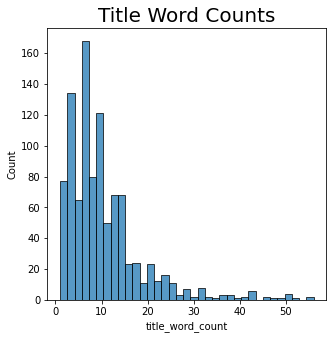

In [25]:
plt.figure(figsize=(5,5))
plt.title("Title Word Counts",fontsize=20);
sns.histplot(data=sr_word_counts,x='title_word_count',palette='mako');

###### Based on the histogram the majority of titles are between 1-15 words, but this is clearly right skewed.

In [26]:
subreddits.describe() # just to see a table o what the title lengths and word counts are

,is_mgs,title_length,title_word_count
count,1000.00000,1000.000000,1000.000000
mean,0.50000,56.061000,10.407000
std,0.50025,43.833191,8.401067
min,0.00000,1.000000,1.000000
25%,0.00000,28.000000,5.000000
50%,0.50000,46.000000,8.000000
75%,1.00000,70.000000,13.000000
max,1.00000,301.000000,56.000000


In [27]:
subreddits.isna().sum()

subreddit           0
title               0
is_mgs              0
clean_title         7
title_length        0
title_word_count    0
dtype: int64

In [28]:
subreddits.dropna(inplace=True)
subreddits.to_csv('./data/final_df')

#### Let's take a deeper look at what words are in the titles

###### Here are the top 15 most frequent words in r/metalgearsolid.

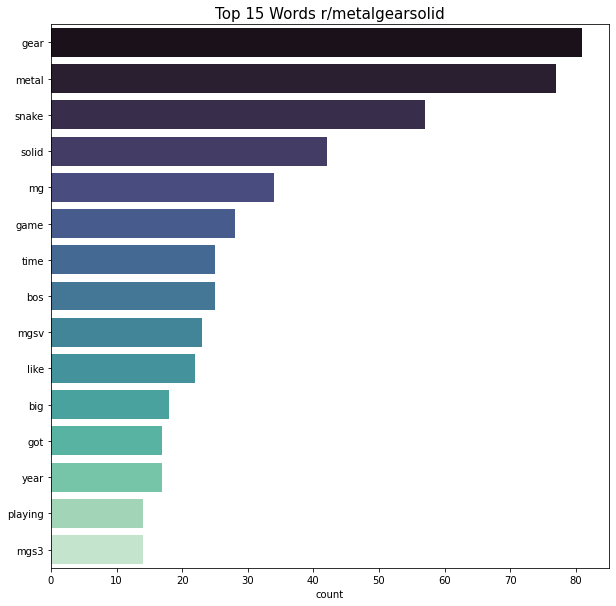

In [38]:
cvect=CountVectorizer(stop_words="english",ngram_range=(1,1))
clean_titles=cvect.fit_transform(mgs["clean_title"])

title_words=pd.DataFrame(data=clean_titles.toarray(), columns=cvect.get_feature_names_out())

title_words.head()

top15=pd.DataFrame(title_words.sum().sort_values(ascending=False)[:15])

top15
top15.rename(columns={0:'count'},inplace=True)

plt.figure(figsize=(10,10))
plt.title("Top 15 Words r/metalgearsolid",fontsize=15)
plt.xlabel('Words')
sns.barplot(data=top15,x=top15['count'],y=top15.index,palette='mako',orient='h');

###### Here are the top 15 most frequent words in r/Skyrim.

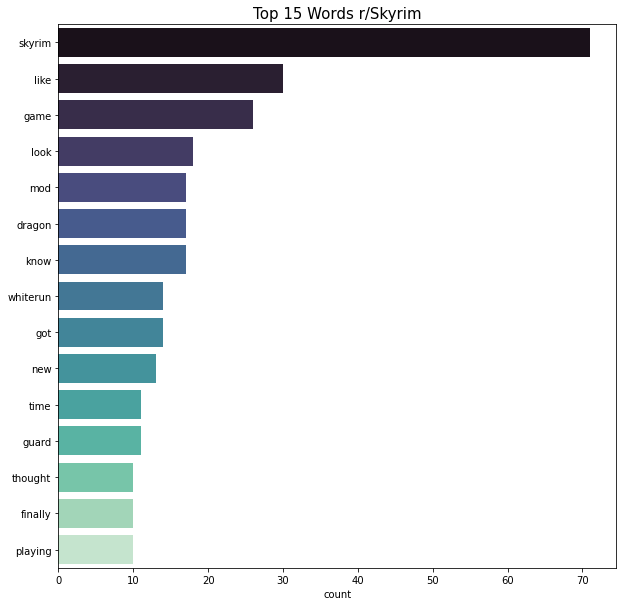

In [40]:
cvect=CountVectorizer(stop_words="english",ngram_range=(1,1))
clean_titles=cvect.fit_transform(skyrim["clean_title"])

title_words=pd.DataFrame(data=clean_titles.toarray(), columns=cvect.get_feature_names_out())

title_words.head()

top15=pd.DataFrame(title_words.sum().sort_values(ascending=False)[:15])

top15
top15.rename(columns={0:'count'},inplace=True)

plt.figure(figsize=(10,10))
plt.title("Top 15 Words r/Skyrim",fontsize=15)
plt.xlabel('Words')
sns.barplot(data=top15,x=top15['count'],y=top15.index,palette='mako',orient='h');

###### Here are the top 15 most frequent word pairs in r/metalgearsolid.

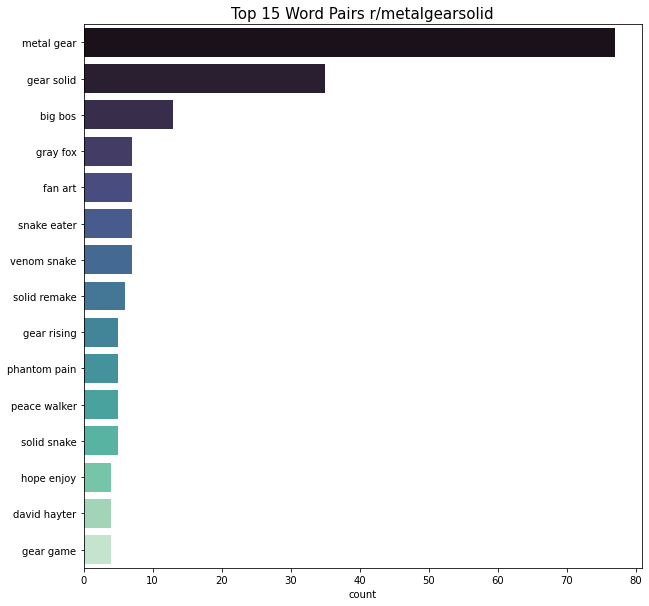

In [41]:
clean_titles2=subreddits['title']
cvect=CountVectorizer(stop_words="english",ngram_range=(2,2))
clean_titles2=cvect.fit_transform(mgs["clean_title"])

title_words2=pd.DataFrame(data=clean_titles2.toarray(), columns=cvect.get_feature_names_out())


top15_2=pd.DataFrame(title_words2.sum().sort_values(ascending=False)[:15])

top15_2.rename(columns={0:'count'},inplace=True)

plt.figure(figsize=(10,10));
plt.title("Top 15 Word Pairs r/metalgearsolid",fontsize=15);
plt.xlabel('Word Pairs');
sns.barplot(data=top15_2,x=top15_2['count'],y=top15_2.index,palette='mako',orient='h');

###### Here are the top 15 most frequent word triplets in r/metalgearsolid.

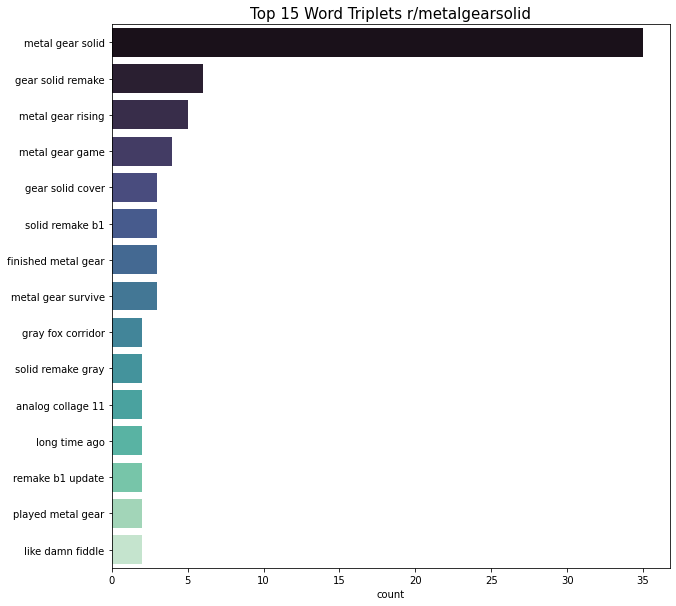

In [43]:
clean_titles2=subreddits['title']
cvect=CountVectorizer(stop_words="english",ngram_range=(3,3))
clean_titles2=cvect.fit_transform(mgs["clean_title"])

title_words2=pd.DataFrame(data=clean_titles2.toarray(), columns=cvect.get_feature_names_out())


top15_2=pd.DataFrame(title_words2.sum().sort_values(ascending=False)[:15])

top15_2.rename(columns={0:'count'},inplace=True)

plt.figure(figsize=(10,10));
plt.title("Top 15 Word Triplets r/metalgearsolid",fontsize=15);
plt.xlabel('Word Triplets');
sns.barplot(data=top15_2,x=top15_2['count'],y=top15_2.index,palette='mako',orient='h');

###### Here are the top 15 most frequent word triplets in r/Skyrim.

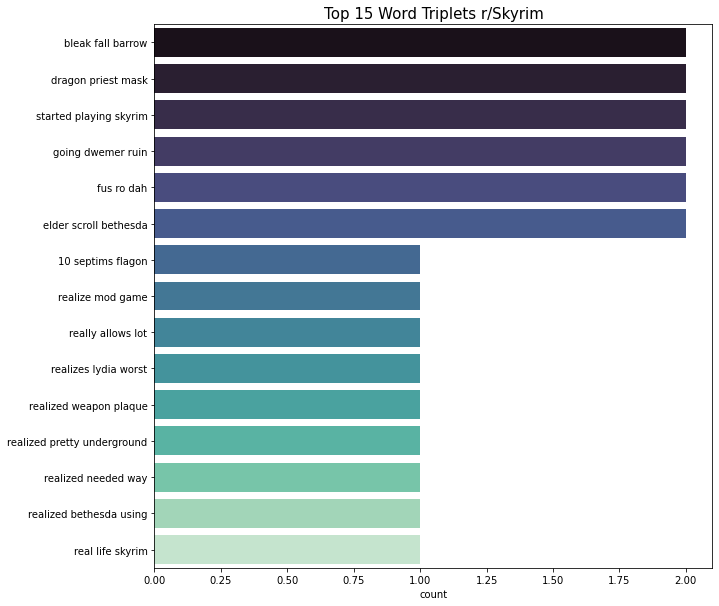

In [44]:
clean_titles2=subreddits['title']
cvect=CountVectorizer(stop_words="english",ngram_range=(3,3))
clean_titles2=cvect.fit_transform(skyrim["clean_title"])

title_words2=pd.DataFrame(data=clean_titles2.toarray(), columns=cvect.get_feature_names_out())


top15_2=pd.DataFrame(title_words2.sum().sort_values(ascending=False)[:15])

top15_2.rename(columns={0:'count'},inplace=True)

plt.figure(figsize=(10,10));
plt.title("Top 15 Word Triplets r/Skyrim",fontsize=15);
plt.xlabel('Word Triplets');
sns.barplot(data=top15_2,x=top15_2['count'],y=top15_2.index,palette='mako',orient='h');